In [4]:
import pandas as pd
import numpy as np
import copy

In [5]:
result = pd.read_csv('testX.csv', index_col=0)

In [86]:
def triple_barier_labels(data,day_barrier = 5, pct_barrier = 0.05):
  label =  copy.deepcopy(data) * 0
  for i in range (day_barrier, 0, -1):
    temp = data.pct_change(i)
    flag = 0
    for x,v in enumerate(temp.index):
      if np.isnan(temp.loc[v]): continue
      if temp.loc[v] >= pct_barrier: 
        label.loc[v] = i
        flag +=1
      elif temp.loc[v] <= -pct_barrier: 
        label.loc[v] = -i
        flag +=1
    # print(f"{i}: {flag}")
  return label

In [6]:
result

MACD_5_20       VWAP  signal_momentum     PSY60     RSI60  \
2023-12-14   0.105850  44.373964        -0.002805  0.450000  0.412010   
2023-12-14   0.259531  50.906976        -0.004315  0.450000  0.427835   
2023-12-14  -0.306990  21.423491        -0.036337  0.366667  0.368702   
2023-12-14   0.215566  11.892855        -0.002637  0.433333  0.574586   
2023-12-14  -0.051507  64.915467        -0.020656  0.433333  0.392391   
...               ...        ...              ...       ...       ...   
2025-02-28   1.894701  50.101616         0.114173  0.466667  0.637387   
2025-02-28   0.462302  27.245200         0.023750  0.516667  0.574335   
2025-02-28   0.194517  17.136746         0.021196  0.416667  0.516949   
2025-02-28   0.199288  15.558699         0.005035  0.516667  0.613520   
2025-02-28   0.271823  27.646515         0.051360  0.316667  0.465116   

               RSI20    PSY252  MACD_20_60  changepoint_bocd    RSI252  PSY20  \
2023-12-14  0.494382  0.500000   -0.378372          0.056231  0.517075   0.50   
2023-12-14  0.486312  0.428571   -0.639567          0.057963  0.464459   0.45   
2023-12-14  0.184874  0.436508   -1.088584          0.066442  0.470431   0.15   
2023-12-14  0.491228  0.503968    0.387963          0.058306  0.563888   0.50   
2023-12-14  0.454545  0.472222   -2.607245          0.053941  0.474939   0.45   
...              ...       ...         ...               ...       ...    ...   
2025-02-28  0.688312  0.440476    3.271105          0.000000  0.561680   0.45   
2025-02-28  0.595960  0.428571    0.735471          0.000000  0.483083   0.50   
2025-02-28  0.579592  0.436508    0.069097          0.000000  0.512124   0.50   
2025-02-28  0.523585  0.396825    0.553448          0.000000  0.530721   0.55   
2025-02-28  0.619718  0.373016   -0.156772          0.000000  0.438129   0.45   

            prediction Symbol  Close  
2023-12-14         0.0    PLX  31.99  
2023-12-14         0.0    BVH  39.23  
2023-12-14         0.0    SSB  19.89  
2023-12-14         0.0    HDB  15.13  
2023-12-14         0.0    VHM  40.30  
...                ...    ...    ...  
2025-02-28         0.0    BVH  56.60  
2025-02-28         0.0    BID  40.95  
2025-02-28         0.0    VPB  18.79  
2025-02-28         0.0    VIB  19.96  
2025-02-28         0.0    VRE  17.40  

[8970 rows x 14 columns]

In [29]:
data = pd.DataFrame(columns=result["Symbol"].unique(), index=result.index.unique())
for symbol in data.columns:
  data[symbol] = result['Close'][result['Symbol'] == symbol].values
  # data[symbol] = data[symbol].astype(float).pct_change()
# data.iloc[0] = 0.0
data

PLX    BVH    SSB    HDB    VHM    VJC   MSN    VRE    VCB  \
2023-12-14  31.99  39.23  19.89  15.13  40.30  105.3  65.0  22.85  56.46   
2023-12-15  31.94  38.60  19.89  15.21  39.90  103.0  63.0  22.55  54.98   
2023-12-18  31.57  38.16  19.89  14.73  39.90  105.0  62.9  22.60  54.52   
2023-12-19  31.61  38.30  19.89  15.17  39.50  104.3  62.2  22.70  54.31   
2023-12-20  32.03  38.45  19.89  15.05  39.95  104.3  63.9  23.00  54.25   
...           ...    ...    ...    ...    ...    ...   ...    ...    ...   
2025-02-24  41.61  58.70  19.65  23.45  40.25   96.6  67.6  17.35  62.54   
2025-02-25  41.90  57.20  19.60  23.20  40.75   96.1  68.4  17.25  61.94   
2025-02-26  41.85  57.80  19.30  23.05  40.70   97.1  68.3  17.15  61.74   
2025-02-27  41.56  57.80  19.50  23.20  41.05   96.9  68.4  17.20  62.88   
2025-02-28  42.14  56.60  19.40  23.05  41.20   96.0  67.7  17.40  62.41   

              BCM  ...   SHB    SSI    STB    ACB    HPG    TPB    TCB    MBB  \
2023-12-14  62.74  ...  8.98  24.98  27.10  15.79  24.59  12.77  14.81  15.36   
2023-12-15  61.07  ...  8.98  24.83  27.10  15.97  24.36  12.81  14.84  15.36   
2023-12-18  59.79  ...  8.90  24.75  26.30  16.00  24.18  12.77  14.57  15.31   
2023-12-19  60.08  ...  8.90  25.10  26.60  16.18  24.73  12.85  14.84  15.44   
2023-12-20  60.38  ...  8.90  25.22  26.95  16.28  24.73  12.77  14.72  15.44   
...           ...  ...   ...    ...    ...    ...    ...    ...    ...    ...   
2025-02-24  74.50  ...  9.68  25.85  39.40  21.85  27.70  15.89  26.50  23.00   
2025-02-25  76.60  ...  9.68  25.85  39.25  21.72  27.50  15.80  26.40  23.40   
2025-02-26  76.40  ...  9.73  25.85  38.55  21.68  27.75  15.80  26.30  23.20   
2025-02-27  76.00  ...  9.68  26.10  38.30  21.81  28.45  15.75  26.25  23.20   
2025-02-28  75.70  ...  9.64  26.30  38.25  21.72  28.00  15.57  26.10  23.00   

              GAS    VNM  
2023-12-14  69.98  62.07  
2023-12-15  69.16  61.80  
2023-12-18  68.70  60.80  
2023-12-19  68.25  60.80  
2023-12-20  68.43  61.80  
...           ...    ...  
2025-02-24  68.60  61.62  
2025-02-25  68.70  60.75  
2025-02-26  68.40  60.94  
2025-02-27  68.00  60.07  
2025-02-28  68.00  60.07  

[299 rows x 30 columns]

In [30]:
signal = pd.DataFrame(columns=result["Symbol"].unique(), index=result.index.unique())
for symbol in data.columns:
  signal[symbol] = result['prediction'][result['Symbol'] == symbol].values
signal

PLX  BVH  SSB  HDB  VHM  VJC  MSN  VRE  VCB  BCM  ...  SHB  SSI  \
2023-12-14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2023-12-15  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2023-12-18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
2023-12-19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
2023-12-20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2025-02-24  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
2025-02-25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2025-02-26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0   
2025-02-27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2025-02-28  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

            STB  ACB  HPG  TPB  TCB  MBB  GAS  VNM  
2023-12-14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2023-12-15  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2023-12-18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2023-12-19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2023-12-20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...         ...  ...  ...  ...  ...  ...  ...  ...  
2025-02-24  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2025-02-25  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2025-02-26  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2025-02-27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2025-02-28  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[299 rows x 30 columns]

In [96]:
for symbol in data.columns:
   print((triple_barier_labels(data[symbol]) * signal[symbol]).value_counts())

PLX
0.0    287
1.0      3
2.0      3
4.0      3
3.0      2
5.0      1
Name: count, dtype: int64
BVH
0.0    280
2.0      5
1.0      4
5.0      4
3.0      3
4.0      3
Name: count, dtype: int64
SSB
 0.0    283
 5.0      6
 4.0      5
 2.0      2
 3.0      2
-1.0      1
Name: count, dtype: int64
HDB
 0.0    272
 3.0      9
 4.0      7
 5.0      6
 2.0      3
 1.0      1
-4.0      1
Name: count, dtype: int64
VHM
0.0    289
3.0      3
2.0      3
5.0      2
1.0      2
Name: count, dtype: int64
VJC
0.0    294
1.0      1
2.0      1
3.0      1
4.0      1
5.0      1
Name: count, dtype: int64
MSN
0.0    285
4.0      5
2.0      4
5.0      2
1.0      2
3.0      1
Name: count, dtype: int64
VRE
0.0    290
1.0      3
3.0      2
4.0      2
2.0      1
5.0      1
Name: count, dtype: int64
VCB
0.0    292
3.0      2
5.0      2
4.0      1
1.0      1
2.0      1
Name: count, dtype: int64
BCM
 0.0    281
 2.0      7
 1.0      3
 3.0      3
 4.0      2
 5.0      1
-1.0      1
-2.0      1
Name: count, dtype: int

In [ ]:
def Volatility_scale(data, ignore_na=False, adjust = True, com = 60, min_periods=0):
    """Scale data using ex ante volatility"""

    # Lưu trữ index, tức thời gian 
    std_index = data.index

    # chứa kết quả
    daily_index = pd.DataFrame(index=std_index)

    # xét từng cổ phiếu
    for oo in data.columns:
        returns = data[oo]  # Lấy ra các return
        returns.dropna(inplace=True)  # xử lý null bằng zero

        returns = returns.rolling(2).apply(lambda x: x.iloc[1] / x.iloc[0] - 1)
        returns.iloc[0] =  0

        # Tính cumulative (cum) return , nhưng ko có thành phần - 1
        ret_index = (1 + returns).cumprod()

        # Tính daily volatility (vol)
        day_vol = returns.ewm(ignore_na=ignore_na,
                              adjust=adjust,
                              com=com,
                              min_periods=min_periods).std(bias=False)
        
        vol = day_vol * np.sqrt(252)  # scale lại theo 252 ngày active trading

        # Join cum return và vol
        ret_index = pd.concat([ret_index, vol], axis=1)
        ret_index.columns = [oo, oo + '_Vol']  # Đặt tên cột cum return là tên cổ phiếu, bên cạnh là vol 

        # Join 
        daily_index = pd.concat([daily_index, ret_index], join = 'outer' ,axis = 0)

    return daily_index


In [ ]:
def backtest(data,signal,day_barrier = 5, pct_barrier = 0.05, vol_flag = 1, target_vol = 0.2, ignore_na = False, adjust = True, com = 60, min_periods = 0):
    
    pnl = pd.DataFrame(index=data.index)
    leverage = pd.DataFrame(index = data.index)

    company = signal.columns

    # gọi hàm Volatility scale
    daily_index = Volatility_scale(data,ignore_na=ignore_na,
                          adjust=adjust,
                          com=com,   
                          min_periods = min_periods)


    # Volatility settings
    vol_flag = vol_flag    # Set flag to 1 for vol targeting
    if vol_flag == 1:
        target_vol = target_vol 
    else:
        target_vol = 'no target vol'
    

    for oo in company:
        df = pd.concat([daily_index[oo], daily_index[oo+"_Vol"]], axis=1)
        df = df.dropna(axis = 0, how = 'all')

        company_signal = signal[oo].dropna(axis = 0, how = 'all')
        df['pnl'] = 0. 
        df['leverage'] = 0.
        # print(df)
        try:
            for x, v in enumerate(df['pnl']):
                if company_signal.iloc[x] == 1:
                    holding_time = abs(triple_barier_labels(df[oo].iloc[x:x+ 5],day_barrier, pct_barrier)[0])
                    if holding_time == 0: holding_time = 5
                    for h_period in range(0,holding_time):
                        if vol_flag == 1:
                            df['pnl'].iloc[x + h_period] = (df[oo].iloc[x + h_period] / df[oo].iloc[x - 1 + h_period] - 1) * \
                                    target_vol / df[oo+"_Vol"].iloc[x - 1] + df['pnl'].iloc[x + h_period]
                            df['leverage'].iloc[x+h_period] = target_vol / df[oo+"_Vol"].iloc[x -1] + df['leverage'].iloc[x+h_period]
                        else:
                            df['pnl'].iloc[x + h_period] = (df[oo].iloc[x + h_period] / df[oo].iloc[x - 1 + h_period] - 1) + df['pnl'].iloc[x + h_period]
                            df['leverage'].iloc[x+h_period] = 1
        except: pass

        leverage = pd.concat([leverage, df['leverage']], join = 'outer',axis = 1)
        pnl = pd.concat([pnl, df['pnl']], join = 'outer',axis=1)

    pnl.columns = signal.columns
    leverage.columns = signal.columns

    return [pnl,leverage]

In [ ]:
def strategy_daily_return(pnl):
    
    return pnl.mean(axis = 0)

In [173]:
backtest_result = strategy_daily_return(backtest(data, signal, vol_flag=1, target_vol=0.2)[0])
backtest_result

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

2023-12-14    0.000000
2023-12-15    0.000000
2023-12-18   -0.001290
2023-12-19    0.001027
2023-12-20    0.001521
                ...   
2025-02-24    0.003155
2025-02-25   -0.002033
2025-02-26    0.002335
2025-02-27    0.001060
2025-02-28   -0.001938
Length: 299, dtype: float64

In [174]:
from vnstock import Vnstock

def VN_Index_data(start_time,end_time, list_choice = 'VN30', interval = '1D'):
    stock = Vnstock().stock(symbol='ACB', source='VCI')
    stock_list = ['VN30']

    futures = pd.DataFrame()

    for ma_ck in stock_list:
        try:
            stock = Vnstock().stock(symbol= ma_ck, source='VCI')
            df = stock.quote.history(start= start_time, end= end_time, interval= interval)
            df = df.set_index('time')
            df = pd.DataFrame(df['close'])
            df.columns = [ma_ck]
            df.index = df.index.date
            futures = pd.concat([futures,df],axis = 1, join = 'outer').sort_index()
        except:
            continue

    if interval != '1D':
      futures['Date']= pd.to_datetime(futures.index, format='%Y-%m-%d')
    else:
      futures['Date'] = pd.to_datetime(futures.index, format='%Y-%m-%d %H:%M:%S')
    futures.set_index('Date', inplace=True)

    return futures

In [175]:
start_time = '2023-12-14'
# start_time = '2023-12-31'
end_time = '2025-03-01'

Index = VN_Index_data(start_time, end_time)
print(Index)
Index = Index.pct_change()
Index.iloc[0] = 0
Index


2025-06-20 23:59:44 - vnstock.common.data.data_explorer - INFO - Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.


               VN30
Date               
2023-12-14  1104.49
2023-12-15  1097.40
2023-12-18  1084.67
2023-12-19  1091.87
2023-12-20  1097.01
...             ...
2025-02-24  1364.52
2025-02-25  1360.56
2025-02-26  1360.56
2025-02-27  1363.62
2025-02-28  1356.43

[299 rows x 1 columns]


VN30
Date                
2023-12-14  0.000000
2023-12-15 -0.006419
2023-12-18 -0.011600
2023-12-19  0.006638
2023-12-20  0.004708
...              ...
2025-02-24  0.007971
2025-02-25 -0.002902
2025-02-26  0.000000
2025-02-27  0.002249
2025-02-28 -0.005273

[299 rows x 1 columns]

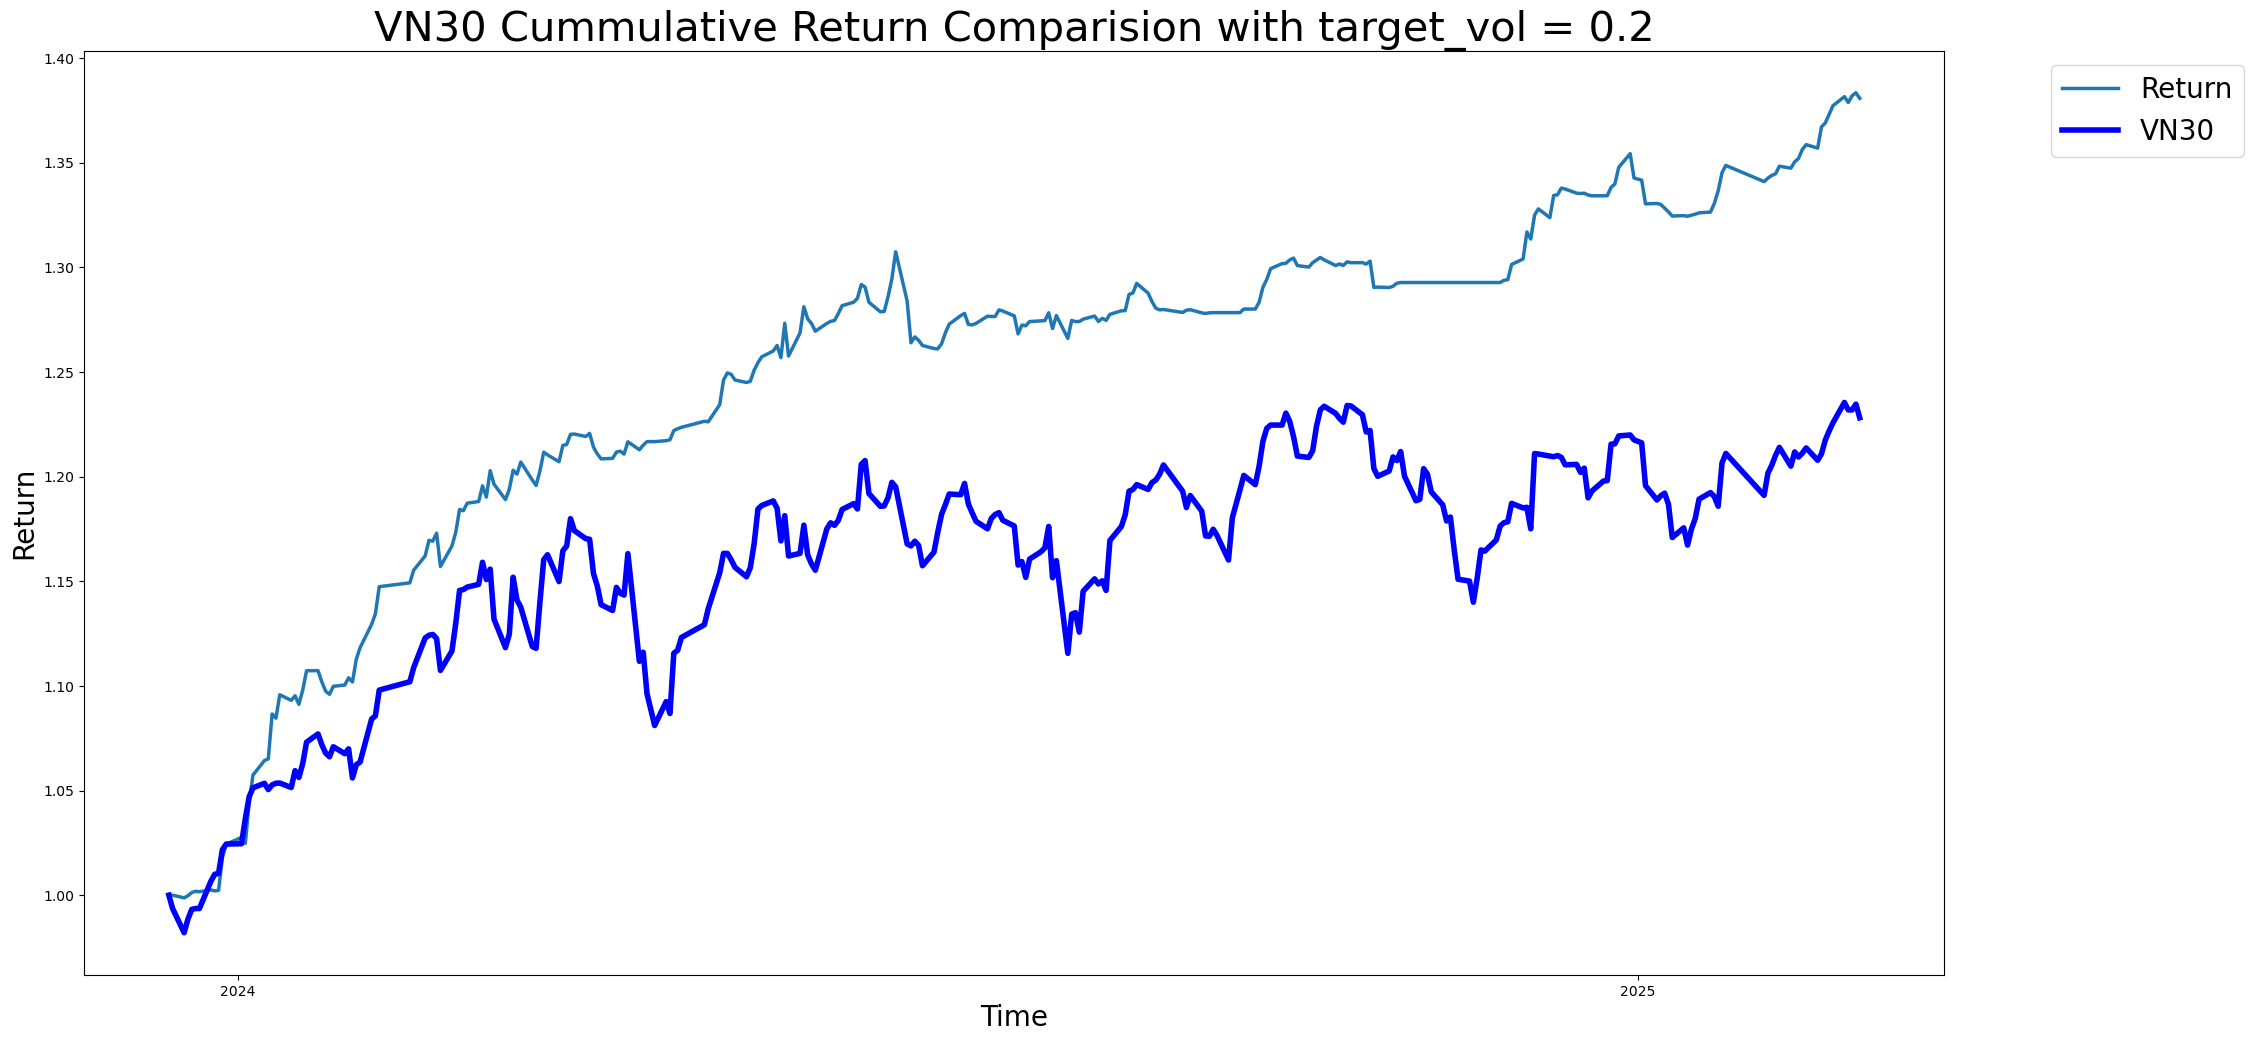

In [176]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(24, 12))

# by = ['2023-12-29 00:00:00']

benchmark = (Index+1).cumprod()

cummulative_return = (backtest_result+1).cumprod()

cummulative_return.index = pd.to_datetime(cummulative_return.index)
ax.plot(cummulative_return, label = "Return", linewidth = 2.5)

ax.xaxis.set_major_locator(mdates.YearLocator())

ax.plot(benchmark, color = 'Blue', linewidth = 4., label = 'VN30')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 20)

ax.set_xlabel("Time", fontsize = 20)
ax.set_ylabel("Return", fontsize = 20)


plt.title('VN30 Cummulative Return Comparision with target_vol = 0.2', fontsize = 30)
plt.show()



In [177]:
def cummulative_returning(data):
    return  (data + 1).cumprod(axis = 0).iloc[-1]

def annualise_return(data):
    return (cummulative_returning(data))**(252/ (data.shape[0] - 1))

def sharpe_ratio(data):
    return (data.mean(axis = 0)/data.std(axis = 0, ddof = 1))* np.sqrt(252)

def maximum_drawdown(data):
    cumulative = (data + 1).cumprod(axis = 0)
    max_return = cumulative.cummax(axis = 0)
    return cumulative.sub(max_return).div(max_return).min(axis = 0)

def calmar_ratio(data):
    return annualise_return(data)/ -maximum_drawdown(data)

def sortino_ratio(df):
    k = df > 0
    x= df
    x[k] = 0.0
    x = np.square(x)
    x = np.nanmean(x, axis = 0)
    x = np.sqrt(x) * np.sqrt(252)
    x
    y = np.nanmean(df, axis = 0)
    return y/x * np.sqrt(252)

In [178]:
print("Cummulative Return: ",cummulative_returning(backtest_result))
print("Annual Return: ",annualise_return(backtest_result))
print("Sharpe Ratio: ",sharpe_ratio(backtest_result))
print("Max Drawdown: ",maximum_drawdown(backtest_result))
print("Calmar Ratio: ", calmar_ratio(backtest_result))
print("Sortino Ratio: ", sortino_ratio(backtest_result))
print("Done")

Cummulative Return:  1.3807285910258211
Annual Return:  1.3136535974828385
Sharpe Ratio:  3.9422879065109115
Max Drawdown:  -0.03548475955443824
Calmar Ratio:  37.02021977822684
Sortino Ratio:  -0.3614099015252824
Done
